In [17]:
# Exploratory Data Analysis (EDA)

# This notebook explores the Flipkart product dataset in `productos_preprocesados.csv`.

In [18]:
# Setup
import sys, subprocess

def pip_install(package):
    try:
        __import__(package)
    except ImportError:
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])

# Ensure deps
for pkg in ['pandas', 'numpy', 'matplotlib', 'seaborn', 'wordcloud', 'spacy', 'textblob']:
    pip_install(pkg)

# Try spaCy english model
try:
    import spacy
    try:
        nlp = spacy.load('en_core_web_sm')
    except Exception:
        subprocess.check_call([sys.executable, '-m', 'spacy', 'download', 'en_core_web_sm'])
        nlp = spacy.load('en_core_web_sm')
except Exception:
    nlp = None

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

sns.set_theme(style='whitegrid')

CSV_PATH = '../../data/productos_preprocesados.csv'

pd.set_option('display.max_colwidth', 200)



In [19]:
# Load data and initial schema view
raw = pd.read_csv(CSV_PATH)
print('Rows:', len(raw))
print('Columns:', len(raw.columns))
print('Columns list:', list(raw.columns))

# Peek
display(raw.head(3))

# Dtypes
display(raw.dtypes)

# Basic nulls
nulls = raw.isna().sum().sort_values(ascending=False)
display(nulls[nulls > 0])

raw.sample(3, random_state=42)


Rows: 28080
Columns: 14
Columns list: ['pid', 'title', 'description', 'brand', 'category', 'sub_category', 'product_details', 'seller', 'out_of_stock', 'selling_price', 'discount', 'actual_price', 'average_rating', 'url']


,pid,title,description,brand,category,sub_category,product_details,seller,out_of_stock,selling_price,discount,actual_price,average_rating,url
0,TKPFCZ9EA7H5FYZH,solid women multicolor track pant,yorker trackpant made rich comb cotton give rich lookdesign comfortskin friendli fabricitchfre waistband great year round use proudli made india,York,Clothing and Accessories,Bottomwear,style code: combo | closure: elast | pockets: side pocket | fabric: cotton blend | pattern: solid | color: multicolor,Shyam Enterprises,0,921.0,69.0,2999.0,3.9,https://www.flipkart.com/yorker-solid-men-multicolor-track-pants/p/itmd2c76aadce459?pid=TKPFCZ9EA7H5FYZH&lid=LSTTKPFCZ9EA7H5FYZHVYXWP0&marketplace=FLIPKART&srno=b_1_1&otracker=browse&fm=organic&ii...
1,TKPFCZ9EJZV2UVRZ,solid men blue track pant,yorker trackpant made rich comb cotton give rich lookdesign comfortskin friendli fabricitchfre waistband great year round use proudli made india,York,Clothing and Accessories,Bottomwear,style code: blue | closure: drawstr elast | pockets: side pocket | fabric: cotton blend | pattern: solid | color: blue,Shyam Enterprises,0,499.0,66.0,1499.0,3.9,https://www.flipkart.com/yorker-solid-men-blue-track-pants/p/itmfczez7v6rzwer?pid=TKPFCZ9EJZV2UVRZ&lid=LSTTKPFCZ9EJZV2UVRZ9HEITU&marketplace=FLIPKART&srno=b_1_2&otracker=browse&fm=organic&iid=177a...
2,TKPFCZ9EHFCY5Z4Y,solid men multicolor track pant,yorker trackpant made rich comb cotton give rich lookdesign comfortskin friendli fabricitchfre waistband great year round use proudli made india,York,Clothing and Accessories,Bottomwear,style code: combo | closure: elast | pockets: side pocket | fabric: cotton blend | pattern: solid | color: multicolor,Shyam Enterprises,0,931.0,68.0,2999.0,3.9,https://www.flipkart.com/yorker-solid-men-multicolor-track-pants/p/itm1eee3ca648155?pid=TKPFCZ9EHFCY5Z4Y&lid=LSTTKPFCZ9EHFCY5Z4YDOVNQS&marketplace=FLIPKART&srno=b_1_3&otracker=browse&fm=organic&ii...


pid                 object
title               object
description         object
brand               object
category            object
sub_category        object
product_details     object
seller              object
out_of_stock         int64
selling_price      float64
discount           float64
actual_price       float64
average_rating     float64
url                 object
dtype: object

description       11161
average_rating     2261
brand              2009
seller             1643
discount            855
actual_price        777
selling_price         2
dtype: int64

,pid,title,description,brand,category,sub_category,product_details,seller,out_of_stock,selling_price,discount,actual_price,average_rating,url
22664,SHTFW5YQZGWHZPCJ,women regular fit wash mandarin collar casual shirt,atm shirt offer qualiti casual wear widest varieti make easi choos price easi reach excel servic support make shop easi enjoy atm shirt product made premium fabric ensur best qualiti great comfort...,A,Clothing and Accessories,Topwear,pack of: | style code: | closure: button | fit: regular | fabric: denim | sleeve: full sleev | pattern: wash | reversible: | collar: mandarin | color: blue | fabric care: gentl machin wash | su...,ARYACITION,0,999.0,66.0,2999.0,2.8,https://www.flipkart.com/atm-men-washed-casual-blue-shirt/p/itmd63faf2809823?pid=SHTFW5YQZGWHZPCJ&lid=LSTSHTFW5YQZGWHZPCJAHGSHM&marketplace=FLIPKART&srno=b_1_10&otracker=browse&fm=organic&iid=ca99...
5676,SRTFUY4BJRTVV5J8,stripe women dark blue sport short,NaN,M7 By Metrona,Clothing and Accessories,Bottomwear,fabric: polyest | pattern: stripe | color: dark blue | style code: mssspshb | closure: drawstr elast | fabric care: machin wash per tag | type: sport short,RetailNet,0,485.0,55.0,1099.0,3.8,https://www.flipkart.com/m7-metronaut-striped-men-dark-blue-sports-shorts/p/itm0d60041f30171?pid=SRTFUY4BJRTVV5J8&lid=LSTSRTFUY4BJRTVV5J86JYMXA&marketplace=FLIPKART&srno=b_5_173&otracker=browse&fm...
10356,JCKFZSPYYZGCYGZK,sleeveless print women nehru jacket,NaN,True Bl,Clothing and Accessories,Winter Wear,color: black | fabric: polyest blend | pattern: print | style code: black | ideal for: women | sleeve: sleeveless | closure: button | pack of: | suitable for: western wear | reversible: | type: ...,KAPSONSRETAILPVTLTD,0,1599.0,60.0,3999.0,3.6,https://www.flipkart.com/true-blue-sleeveless-printed-men-jacket/p/itm4b5dcdfda5d2e?pid=JCKFZSPYYZGCYGZK&lid=LSTJCKFZSPYYZGCYGZKTLA0FR&marketplace=FLIPKART&srno=b_4_160&otracker=browse&fm=organic&...


In [20]:
# Cleaning and type casting

df = raw.copy()

def parse_price(series):
    s = series.astype(str).str.replace(',', '', regex=False)
    s = s.str.extract(r'(\d+\.?\d*)')[0]
    return pd.to_numeric(s, errors='coerce')

# selling_price, actual_price to numbers
for col in ['selling_price', 'actual_price']:
    if col in df.columns:
        df[col] = parse_price(df[col])

# discount as percentage number if like "69% off" else numeric
if 'discount' in df.columns:
    disc = df['discount'].astype(str).str.extract(r'(\d+\.?\d*)')[0]
    df['discount_pct'] = pd.to_numeric(disc, errors='coerce')

# rating
if 'average_rating' in df.columns:
    df['average_rating'] = pd.to_numeric(df['average_rating'], errors='coerce')

# out_of_stock boolean
if 'out_of_stock' in df.columns:
    df['out_of_stock'] = df['out_of_stock'].astype(str).str.lower().map({'true': True, 'false': False})

# Basic derived fields
if {'selling_price','actual_price'}.issubset(df.columns):
    df['discount_abs'] = df['actual_price'] - df['selling_price']

# Normalize text columns
for col in ['title', 'description', 'product_details']:
    if col in df.columns:
        df[col] = df[col].fillna('').astype(str).str.strip()

# Category consolidation
for col in ['brand', 'seller', 'category', 'sub_category']:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown').astype(str).str.strip()

# Final schema
print(df.dtypes)
df.head(3)


pid                 object
title               object
description         object
brand               object
category            object
sub_category        object
product_details     object
seller              object
out_of_stock        object
selling_price      float64
discount           float64
actual_price       float64
average_rating     float64
url                 object
discount_pct       float64
discount_abs       float64
dtype: object


,pid,title,description,brand,category,sub_category,product_details,seller,out_of_stock,selling_price,discount,actual_price,average_rating,url,discount_pct,discount_abs
0,TKPFCZ9EA7H5FYZH,solid women multicolor track pant,yorker trackpant made rich comb cotton give rich lookdesign comfortskin friendli fabricitchfre waistband great year round use proudli made india,York,Clothing and Accessories,Bottomwear,style code: combo | closure: elast | pockets: side pocket | fabric: cotton blend | pattern: solid | color: multicolor,Shyam Enterprises,NaN,921.0,69.0,2999.0,3.9,https://www.flipkart.com/yorker-solid-men-multicolor-track-pants/p/itmd2c76aadce459?pid=TKPFCZ9EA7H5FYZH&lid=LSTTKPFCZ9EA7H5FYZHVYXWP0&marketplace=FLIPKART&srno=b_1_1&otracker=browse&fm=organic&ii...,69.0,2078.0
1,TKPFCZ9EJZV2UVRZ,solid men blue track pant,yorker trackpant made rich comb cotton give rich lookdesign comfortskin friendli fabricitchfre waistband great year round use proudli made india,York,Clothing and Accessories,Bottomwear,style code: blue | closure: drawstr elast | pockets: side pocket | fabric: cotton blend | pattern: solid | color: blue,Shyam Enterprises,NaN,499.0,66.0,1499.0,3.9,https://www.flipkart.com/yorker-solid-men-blue-track-pants/p/itmfczez7v6rzwer?pid=TKPFCZ9EJZV2UVRZ&lid=LSTTKPFCZ9EJZV2UVRZ9HEITU&marketplace=FLIPKART&srno=b_1_2&otracker=browse&fm=organic&iid=177a...,66.0,1000.0
2,TKPFCZ9EHFCY5Z4Y,solid men multicolor track pant,yorker trackpant made rich comb cotton give rich lookdesign comfortskin friendli fabricitchfre waistband great year round use proudli made india,York,Clothing and Accessories,Bottomwear,style code: combo | closure: elast | pockets: side pocket | fabric: cotton blend | pattern: solid | color: multicolor,Shyam Enterprises,NaN,931.0,68.0,2999.0,3.9,https://www.flipkart.com/yorker-solid-men-multicolor-track-pants/p/itm1eee3ca648155?pid=TKPFCZ9EHFCY5Z4Y&lid=LSTTKPFCZ9EHFCY5Z4YDOVNQS&marketplace=FLIPKART&srno=b_1_3&otracker=browse&fm=organic&ii...,68.0,2068.0


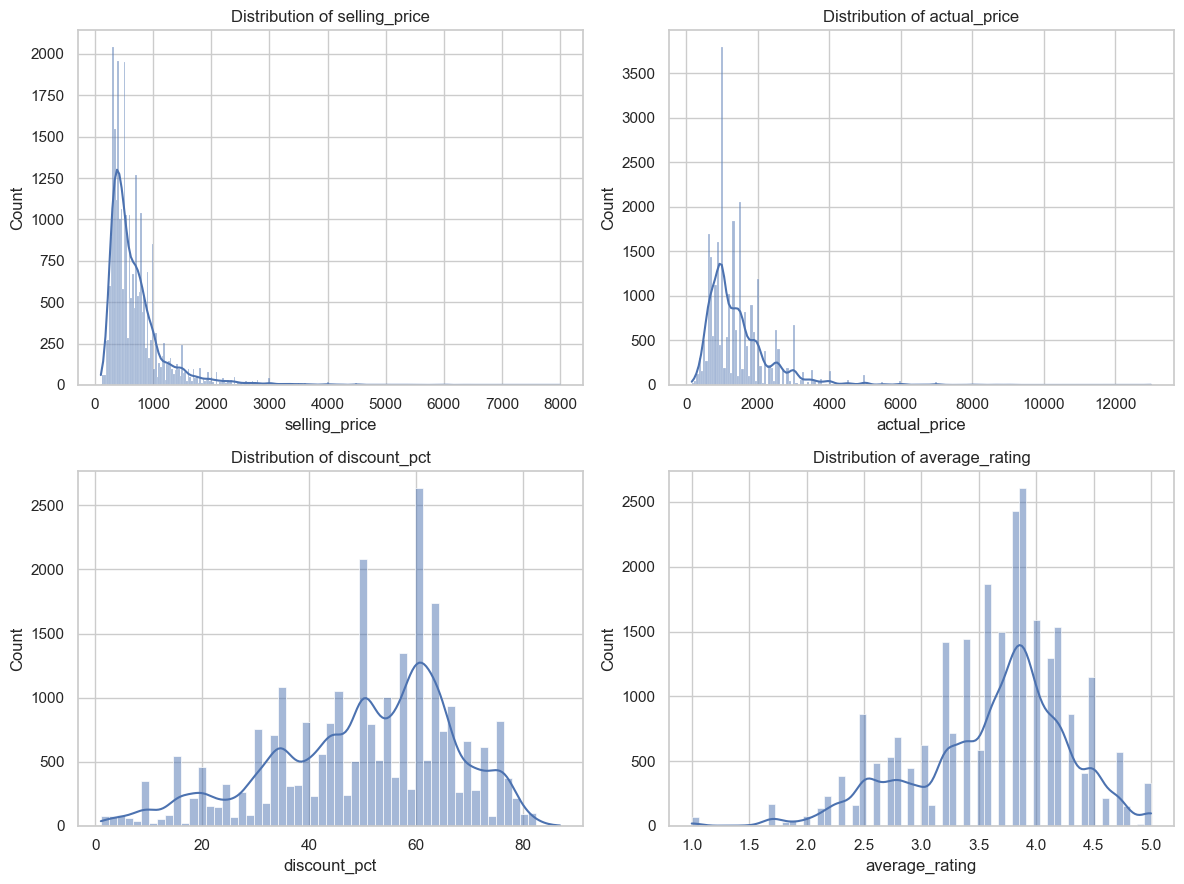

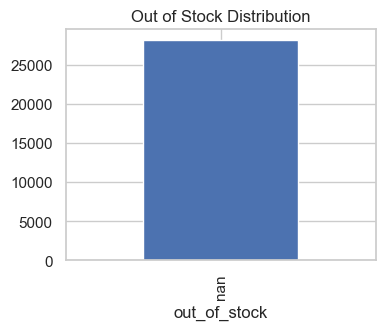

,selling_price,actual_price,discount_pct,average_rating
count,28078.000000,27303.000000,27225.000000,25819.000000
mean,705.635088,1455.528110,50.256896,3.627724
std,549.681489,939.977456,16.887287,0.663429
min,99.000000,150.000000,1.000000,1.000000
25%,390.000000,849.000000,40.000000,3.200000
50%,545.000000,1199.000000,53.000000,3.800000
75%,820.000000,1799.000000,63.000000,4.100000
max,7999.000000,12999.000000,87.000000,5.000000


In [21]:
# Numeric distributions and summaries
fig, axes = plt.subplots(2, 2, figsize=(12, 9))
num_cols = ['selling_price', 'actual_price', 'discount_pct', 'average_rating']
for ax, col in zip(axes.flatten(), num_cols):
    if col in df.columns:
        sns.histplot(df[col].dropna(), kde=True, ax=ax)
        ax.set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Out of stock distribution
if 'out_of_stock' in df.columns:
    plt.figure(figsize=(4,3))
    df['out_of_stock'].value_counts(dropna=False).plot(kind='bar')
    plt.title('Out of Stock Distribution')
    plt.show()

# Descriptive stats
display(df[num_cols].describe(include='all'))


,pid,title,brand,average_rating,selling_price
22361,BRFFM8J3XCQHKYYA,men brief pack,COL,5.0,385.0
8403,VESFN9F35YWEEHDG,vip women vest pack,Unknown,5.0,1108.0
14764,TSHFUEUZDF7J7QDW,graphic print women round neck white tshirt,TEE BUD,5.0,349.0
13240,BRFFFYHUQGBFXZTG,men brief pack,VIKING.INE,5.0,699.0
10472,SHTFZZFERN6EPZNM,men slim fit print spread collar casual shirt,True Bl,5.0,1119.0
12351,TSHFKH7VZA54W6UF,print women hood neck black tshirt,ATTIITU,5.0,1499.0
13242,BRFFFEH4B6JVT5A5,men brief pack,VIKING.INE,5.0,699.0
12349,TSHFGMGPBJXHH3XZ,print men hood neck grey tshirt,ATTIITU,5.0,499.0
12348,TSHFCWYJYURDMMBU,solid women round neck black grey tshirt,ATTIITU,5.0,449.0
10470,TSHFQ4FWQ42YYX9F,solid women polo neck red tshirt,True Bl,5.0,599.0


,pid,title,brand,discount_pct,selling_price,actual_price
906,TSHF5FRXKGF6A4FH,print women round neck white tshirt,Jack Roy,87.0,128.0,998.0
903,TSHFMFT7VASAHBH3,print women round neck white tshirt,Jack Roy,86.0,136.0,999.0
902,TSHFMFXGFJ7G2ABK,print women round neck grey tshirt,Jack Roy,86.0,136.0,999.0
18249,TSHFGH6T3CVGDXS9,print men round neck multicolor tshirt pack,yellowvib,85.0,449.0,2999.0
9811,CAPE9YWMSVSZPM2K,solid balclava cap,Gracew,84.0,228.0,1499.0
18016,TSHFHQNCHJJUQYVQ,print women round neck blue tshirt,yellowvib,84.0,280.0,1800.0
18017,TSHFKHRYJYMEMZHK,print men mandarin collar blue tshirt,yellowvib,84.0,282.0,1800.0
18093,TSHFGFNBYVKZBQ2M,print men collar neck multicolor tshirt,yellowvib,84.0,230.0,1500.0
91,CTPFVZTBN4GRZKXH,nulit satin tie cufflink red,Unknown,84.0,499.0,3299.0
3102,TSHFVM4PQPRY2CRZ,color block women round neck green tshirt,REF,84.0,228.0,1499.0


,pid,title,brand,selling_price
16485,SOCET7QRNHYG9HHB,women midcalfcrew pack,Welwe,99.0
20435,BDAFUBD2EJHFCRNC,men print bandana,T10 Spor,99.0
7654,SOCFFGA2FYZQBFXT,women color block ankl length pack,your shopping sto,118.0
24438,SOCFZ7GFAZGYZGR7,men solid ankl length pack,ina gro,120.0
24437,SOCFZAGJC3VUFQU9,women solid ankl length pack,ina gro,120.0
24439,SOCFZ7JX39ZEW8GE,women solid ankl length pack,ina gro,120.0
20253,CAPEX5YHPH3MSGFC,cotton panel basebal cap,T10 Spor,124.0
16402,SUSECSFFVNKG5VGG,brand trunk back suspend men black,Unknown,125.0
906,TSHF5FRXKGF6A4FH,print women round neck white tshirt,Jack Roy,128.0
25325,SOCFPR9UF8Q4FCHG,men ankl length pack,Pu,132.0


,pid,title,brand,selling_price
2067,TKTFZ3YGGMMNBYEZ,solid women track suit,REEB,7999.0
11010,BZRFVAX2QGTEGHRH,checker singl breast parti women full sleev blazer grey,True Bl,7998.0
26089,SWSFUMFGQFKVZGYH,full sleev print men sweatshirt,Pu,7799.0
25815,JCKFQF5KMJJ349H8,full sleev solid women casual jacket,Pu,7799.0
6895,JEAF8S4GWU5YKQTF,skinni men blue jean,G,7794.0
11008,BZRFVDGUJHTQHDAX,self design singl breast parti women full sleev blazer blue,True Bl,6998.0
6898,JEAF8S4GE8PKH7H3,regular fit men dark blue cotton blend trouser,G,6925.0
6901,JEAF65G3MZYG3BQM,maxx regular men black jean,G,6692.0
25423,JCKFQF5K72AT2JDC,full sleev solid women casual jacket,Pu,6499.0
6855,JEAFEN3WGHH3ZEFY,skinni men blue jean,G,6493.0


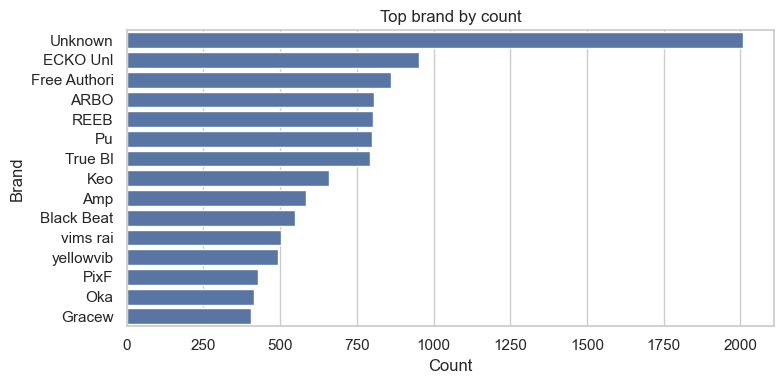

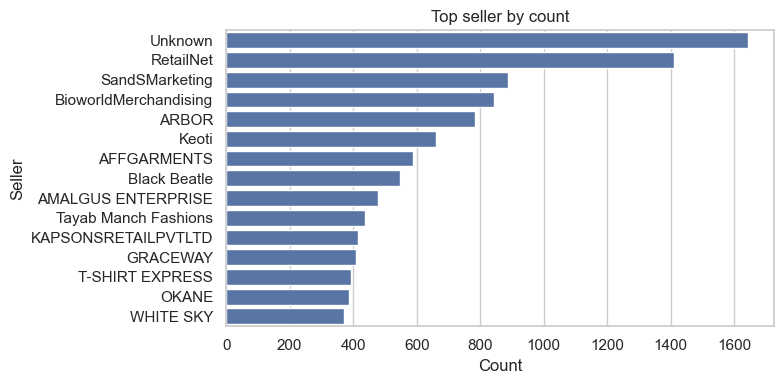

In [22]:
# Rankings and top entities

# Top products by rating (with minimum reviews proxy not available, so just sort)
if 'average_rating' in df.columns:
    top_rated = df.sort_values('average_rating', ascending=False).head(10)
    display(top_rated[['pid','title','brand','average_rating','selling_price']])

# Highest discount percent
if 'discount_pct' in df.columns:
    top_discount = df.sort_values('discount_pct', ascending=False).head(10)
    display(top_discount[['pid','title','brand','discount_pct','selling_price','actual_price']])

# Most expensive and cheapest
if 'selling_price' in df.columns:
    cheapest = df.sort_values('selling_price', ascending=True).head(10)
    expensive = df.sort_values('selling_price', ascending=False).head(10)
    display(cheapest[['pid','title','brand','selling_price']])
    display(expensive[['pid','title','brand','selling_price']])

# Top brands and sellers by count
for col in ['brand','seller']:
    if col in df.columns:
        counts = df[col].value_counts().head(15)
        plt.figure(figsize=(8,4))
        sns.barplot(x=counts.values, y=counts.index)
        plt.title(f'Top {col} by count')
        plt.xlabel('Count')
        plt.ylabel(col.capitalize())
        plt.tight_layout()
        plt.show()


In [23]:
# Text prep: tokenization, word counts, vocabulary, sentence length
import re
from collections import Counter

TEXT_COLS = [c for c in ['title','description','product_details'] if c in df.columns]

def basic_tokenize(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    tokens = [t for t in text.split() if len(t) > 1]
    return tokens

def sentence_lengths(text):
    sentences = re.split(r'[.!?\n]+', text)
    lens = [len(basic_tokenize(s)) for s in sentences if s.strip()]
    return lens

stats = {}
for col in TEXT_COLS:
    all_text = ' '.join(df[col].astype(str).tolist())
    tokens = basic_tokenize(all_text)
    vocab = set(tokens)
    counts = Counter(tokens)
    # Sentence lengths from sample rows to save time
    sample_texts = ' '.join(df[col].astype(str).sample(min(2000, len(df)), random_state=42).tolist())
    sent_lens = sentence_lengths(sample_texts)

    stats[col] = {
        'num_docs': len(df),
        'num_tokens': len(tokens),
        'vocab_size': len(vocab),
        'top_20': counts.most_common(20),
        'avg_sentence_len': float(np.mean(sent_lens) if sent_lens else 0.0),
        'median_sentence_len': float(np.median(sent_lens) if sent_lens else 0.0),
    }

stats


{'title': {'num_docs': 28080,
  'num_tokens': 169370,
  'vocab_size': 642,
  'top_20': [('women', 13143),
   ('men', 13059),
   ('tshirt', 12247),
   ('neck', 11727),
   ('solid', 9246),
   ('round', 8301),
   ('print', 8123),
   ('pack', 4839),
   ('blue', 4378),
   ('fit', 3923),
   ('shirt', 3591),
   ('black', 3503),
   ('casual', 2927),
   ('slim', 2893),
   ('polo', 2668),
   ('collar', 2427),
   ('multicolor', 2373),
   ('white', 2174),
   ('sleev', 2026),
   ('full', 2011)],
  'avg_sentence_len': 12133.0,
  'median_sentence_len': 12133.0},
 'description': {'num_docs': 28080,
  'num_tokens': 509052,
  'vocab_size': 5574,
  'top_20': [('tshirt', 12261),
   ('cotton', 9850),
   ('wear', 9012),
   ('comfort', 8509),
   ('shirt', 7323),
   ('look', 6176),
   ('casual', 5691),
   ('made', 5570),
   ('fit', 5513),
   ('fabric', 5224),
   ('print', 4750),
   ('women', 4373),
   ('design', 4126),
   ('sleev', 4008),
   ('qualiti', 4007),
   ('men', 3733),
   ('day', 3429),
   ('wash', 3

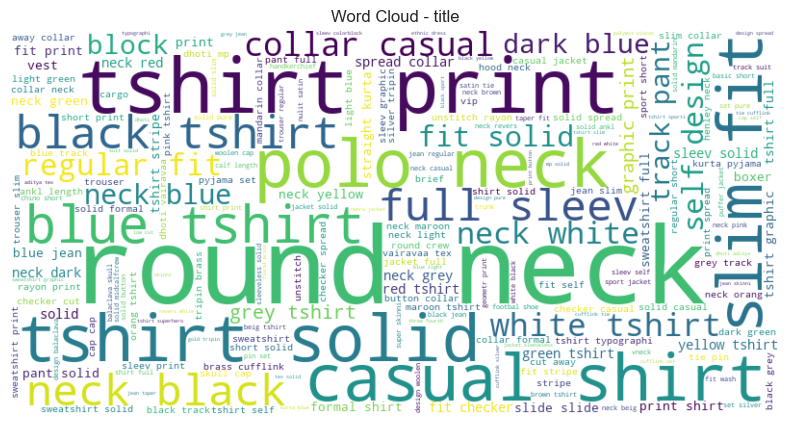

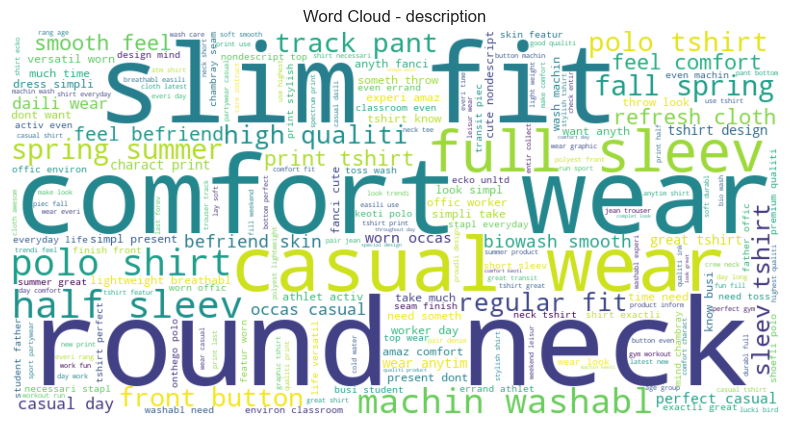

In [24]:
# Word clouds for most frequent words
stopwords = set(STOPWORDS)
# Add domain-specific stopwords
stopwords.update({'men','women','multicolor','color','colors','size','fabric','cotton','blend','pack','combo','free','india','made','style','code'})

for col in [c for c in ['title','description'] if c in df.columns]:
    text = ' '.join(df[col].astype(str).tolist())
    wc = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, max_words=200)
    wc.generate(text)
    plt.figure(figsize=(12,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud - {col}')
    plt.show()


In [25]:
# Named Entity Recognition (NER) on sample descriptions
if nlp is None:
    print('spaCy not available, skipping NER')
else:
    if 'description' in df.columns:
        sample = df['description'].dropna().sample(min(50, df['description'].dropna().shape[0]), random_state=42).tolist()
        ents_counter = Counter()
        examples = []
        for txt in sample:
            doc = nlp(txt)
            for ent in doc.ents:
                ents_counter[(ent.label_, ent.text)] += 1
            examples.append([(ent.text, ent.label_) for ent in doc.ents])
        # Show top entity strings by label
        top_ents = Counter({k: v for k, v in ents_counter.items()}).most_common(20)
        display(top_ents)
        examples[:5]
    else:
        print('No description column for NER')


[(('PERSON', 'lucki bird'), 2),
 (('ORG', 'lucki bird'), 2),
 (('PERSON', 'everi wardrob'), 2),
 (('NORP', 'awesom'), 2),
 (('PERSON', 'trouser denim'), 2),
 (('NORP', 'recycl'), 2),
 (('PERSON', 'singl jersey'), 2),
 (('CARDINAL', 'half'), 2),
 (('ORG', 'great comfort'), 1),
 (('PERSON', 'materi cotton'), 1),
 (('CARDINAL', 'one'), 1),
 (('PERSON', 'sayitloud'), 1),
 (('NORP', 'vestsayit'), 1),
 (('PERSON', 'jean versatil'), 1),
 (('DATE', 'today'), 1),
 (('ORG', 'contemporari'), 1),
 (('DATE', 'winter'), 1),
 (('PERSON', 'trouser zip closur'), 1),
 (('PERSON', 'trouser levi'), 1),
 (('ORG', 'luxuri tshirt india decad'), 1)]